# 1. Purpose
The purpose of this notebook is to create a Convolutional Neural Network (CNN) with TensorFlow for prediction with fashion mnist dataset.

# 2.0 Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.5.0'

# 3.0 Import Fashion MNIST data

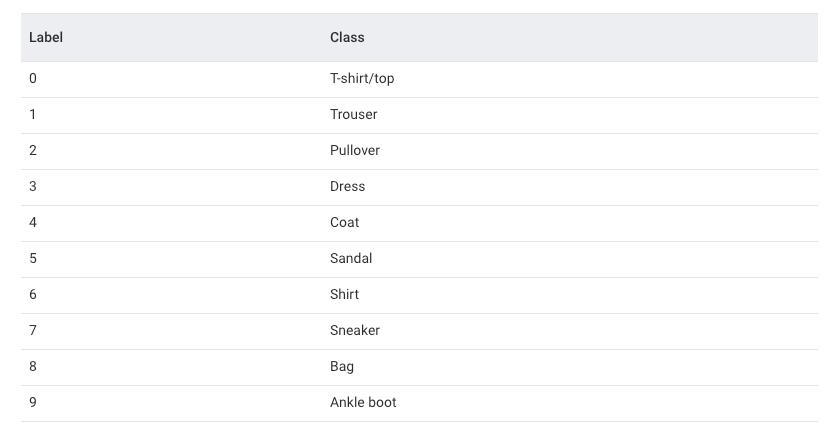

In [3]:
dict_labels={0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}

In [4]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# 4.0 Preprocess Data

In [6]:
x_train[0] #notice that values are in range 0, 255.  We should normalize them

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
x_train=x_train/255.0 #normalize between 0 and 1
x_test=x_test/255.0 #normalize between 0 and 1

(<matplotlib.image.AxesImage at 0x7f4144321e50>, (28, 28))

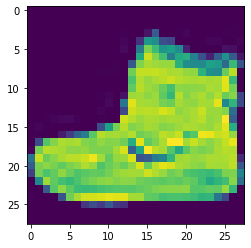

In [8]:
plt.imshow(x_train[0]), x_train[0].shape

In [9]:
dict_labels.get(y_train[0])

'Ankle boot'

# 4.1 myCallback 

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

In [11]:
callbacks=myCallback()

# 5.0 Create MLP DNN Sequential Model

## 5.0.1 MLP, 1 hidden layer, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=accuracy, callbacks=91%, epochs=5

In [12]:
model1=tf.keras.Sequential()
input_shape=x_train[0].shape
input_shape
model1.add(tf.keras.layers.Flatten(input_shape=input_shape))
model1.add(tf.keras.layers.Dense(128, activation = 'relu'))
model1.add(tf.keras.layers.Dense(10,activation='softmax'))
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
%%time
model1.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4984 - accuracy: 0.8243
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3749 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3375 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8904
CPU times: user 25.1 s, sys: 3.61 s, total: 28.8 s
Wall time: 41.7 s


In [15]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3710 - accuracy: 0.8587


[0.3709861934185028, 0.8586999773979187]

In [16]:
y_pred=model1.predict(x_test)

In [17]:
y_pred[0]

array([8.3331180e-08, 4.0815658e-09, 2.2771235e-07, 5.4964446e-09,
       1.0567167e-08, 1.1227306e-03, 3.2482094e-06, 8.1091449e-03,
       2.6258522e-07, 9.9076426e-01], dtype=float32)

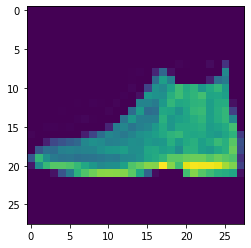

In [18]:
plt.imshow(np.squeeze(x_test[0]))

In [19]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '99.08%')

In [20]:
model1.save('model1') #save model

INFO:tensorflow:Assets written to: model1/assets


In [21]:
model1=tf.keras.models.load_model('model1') #load model

# 5.1 Create MLP CNN Sequential Model

## 5.1.1 MLP, CNN, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=accuracy, callbacks=91%, epochs=5

In [22]:
model2=tf.keras.Sequential()
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
input_shape=x_train[0].shape
input_shape
model2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=input_shape))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation = 'relu'))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [24]:
%%time
model2.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.4417 - accuracy: 0.8395
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 3/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2476 - accuracy: 0.9087
Epoch 4/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2145 - accuracy: 0.9197

Reached 91% accuracy so cancelling training!
CPU times: user 9min 59s, sys: 19.6 s, total: 10min 19s
Wall time: 5min 49s


In [25]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2527 - accuracy: 0.9080


[0.25269386172294617, 0.9079999923706055]

In [26]:
y_pred=model2.predict(x_test)

In [27]:
y_pred[0]

array([1.1323594e-08, 8.9760528e-09, 1.4291340e-08, 2.6084859e-09,
       8.0312351e-10, 3.3229931e-05, 7.8296489e-09, 6.3457010e-05,
       5.8871495e-07, 9.9990261e-01], dtype=float32)

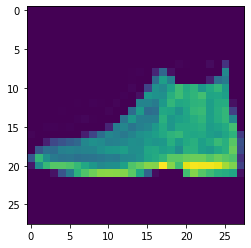

In [28]:
plt.imshow(np.squeeze(x_test[0]))

In [29]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '99.99%')

In [30]:
model2.save('model2') #save model

INFO:tensorflow:Assets written to: model2/assets


In [31]:
model2=tf.keras.models.load_model('model2') #load model

Much more accurate model using the CNN with the same number of epochs.  However, it took longer to train since there were more parameters.  But the accuracy gain is typically more important for the computer vision tasks using CNNs.

## 5.1.2 MLP, CNN, optimizer=Adam, loss=sparse_categorical_crossentropy, metrics=sparse_categorical_accuracy, callbacks=91%, epochs=5

In [32]:
model3=tf.keras.Sequential()
#x_train=np.expand_dims(x_train,-1)
#x_test=np.expand_dims(x_test,-1)
input_shape=x_train[0].shape
input_shape
model3.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=input_shape))
model3.add(tf.keras.layers.MaxPooling2D(2,2))
model3.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D(2,2))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation = 'relu'))
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [33]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [34]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('sparse_categorical_accuracy')>0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

In [35]:
callbacks=myCallback()

In [36]:
%%time
model3.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.4342 - sparse_categorical_accuracy: 0.8415
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2921 - sparse_categorical_accuracy: 0.8928
Epoch 3/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.2457 - sparse_categorical_accuracy: 0.9088
Epoch 4/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2130 - sparse_categorical_accuracy: 0.9208

Reached 91% accuracy so cancelling training!
CPU times: user 9min 58s, sys: 23 s, total: 10min 21s
Wall time: 5min 50s


In [37]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.2564 - sparse_categorical_accuracy: 0.9072


[0.2564123272895813, 0.9071999788284302]

In [38]:
y_pred=model3.predict(x_test)

In [39]:
y_pred[0]

array([3.5567038e-07, 1.8999593e-09, 4.8570445e-07, 1.0387676e-08,
       2.3480490e-08, 3.4757646e-05, 1.5071029e-08, 1.3847349e-04,
       6.3684624e-06, 9.9981958e-01], dtype=float32)

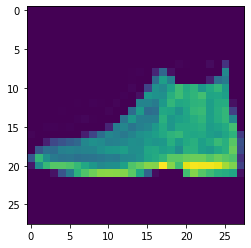

In [40]:
plt.imshow(np.squeeze(x_test[0]))

In [41]:
dict_labels.get(np.argmax(y_pred[0])),np.argmax(y_pred[0]),f'{np.round(100*y_pred[0][np.argmax(y_pred[0])],2)}%'

('Ankle boot', 9, '99.98%')

In [42]:
model3.save('model3') #save model

INFO:tensorflow:Assets written to: model3/assets


In [43]:
model3=tf.keras.models.load_model('model3') #load model

Much more accurate model using the CNN with the same number of epochs.  However, it took longer to train since there were more parameters.  But the accuracy gain is typically more important for the computer vision tasks using CNNs.

# 6.0 Visualizing Convolutions and Pooling

In [44]:
print(y_test[:10]) #notice a random assortment of fashion pieces

[9 2 1 1 6 1 4 6 5 7]


In [45]:
print([dict_labels.get(w) for w in y_test[:10]])

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


In [46]:
layer_output=[layer.output for layer in model2.layers]
layer_output

[<KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 13, 13, 64) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_3')>]

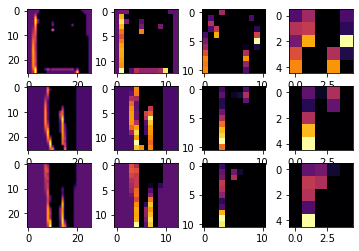

In [47]:
f,axarr = plt.subplots(3,4)
Img1=1
Img2=2
Img3=3
Convolution_Number=2
activation_model=tf.keras.models.Model(inputs=model2.input,outputs=layer_output)
for i in range(4):
  f1=activation_model.predict(np.expand_dims(x_test[Img1],0))[i]
  axarr[0,i].imshow(f1[0,:,:,Convolution_Number],cmap='inferno')
  axarr[0,i].grid(False)
  f2=activation_model.predict(np.expand_dims(x_test[Img2],0))[i]
  axarr[1,i].imshow(f2[0,:,:,Convolution_Number],cmap='inferno')
  axarr[1,i].grid(False)
  f3=activation_model.predict(np.expand_dims(x_test[Img3],0))[i]
  axarr[2,i].imshow(f3[0,:,:,Convolution_Number],cmap='inferno')
  axarr[2,i].grid(False)

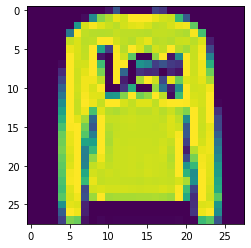

In [48]:
plt.imshow(np.squeeze(x_test[Img1]))

In [49]:
# retrieve weights from the second hidden layer
filters, biases = model2.layers[0].get_weights()

In [50]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

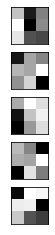

In [51]:
# plot first few filters
n_filters, ix = 5, 1 #64 filters total specified
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 1, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

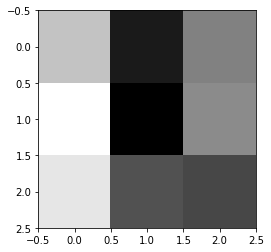

In [52]:
plt.imshow(filters[:,:,0,0],cmap='gray')

In [53]:
filters[:,:,0,0]

array([[0.87269664, 0.64455056, 0.7832358 ],
       [0.95341486, 0.6085843 , 0.796772  ],
       [0.91943955, 0.72006786, 0.70430225]], dtype=float32)

In [54]:
filters.shape

(3, 3, 1, 64)

In [55]:
x_test[Img1].shape[0]

28

In [56]:
new_image=np.zeros(shape=x_test[Img1].shape)
new_image.shape

(28, 28, 1)

In [57]:
f_wind_i=filters[:,:,0,0].shape[0]
f_wind_j=filters[:,:,0,0].shape[1]
for i in range(0,x_test[Img1].shape[0]):
  for j in range(0,x_test[Img1].shape[1]):
    try:
      list1=np.array(filters[:,:,0,0]) 
      list2=np.array(x_test[Img1][i:i+f_wind_i,j:j+f_wind_j,0])
      new_image[i,j] = sum(sum([ii*jj for (ii,jj) in zip(list1,list2)]))
    except:
      new_image[i,j]=0

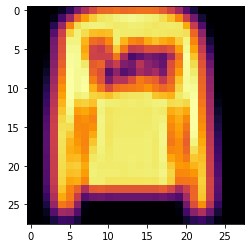

In [58]:
plt.imshow(np.squeeze(new_image),cmap='inferno')

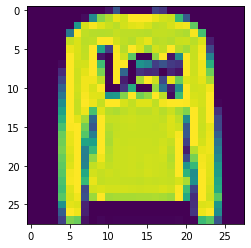

In [59]:
plt.imshow(np.squeeze(x_test[Img1]))

# Zip Models

In [60]:
!zip -r /content/model1.zip /content/model1

  adding: content/model1/ (stored 0%)
  adding: content/model1/assets/ (stored 0%)
  adding: content/model1/saved_model.pb (deflated 86%)
  adding: content/model1/keras_metadata.pb (deflated 85%)
  adding: content/model1/variables/ (stored 0%)
  adding: content/model1/variables/variables.index (deflated 59%)
  adding: content/model1/variables/variables.data-00000-of-00001 (deflated 8%)


In [61]:
!zip -r /content/model2.zip /content/model2

  adding: content/model2/ (stored 0%)
  adding: content/model2/assets/ (stored 0%)
  adding: content/model2/saved_model.pb (deflated 88%)
  adding: content/model2/keras_metadata.pb (deflated 90%)
  adding: content/model2/variables/ (stored 0%)
  adding: content/model2/variables/variables.index (deflated 64%)
  adding: content/model2/variables/variables.data-00000-of-00001 (deflated 14%)


In [62]:
!zip -r /content/model3.zip /content/model3

  adding: content/model3/ (stored 0%)
  adding: content/model3/assets/ (stored 0%)
  adding: content/model3/saved_model.pb (deflated 88%)
  adding: content/model3/keras_metadata.pb (deflated 90%)
  adding: content/model3/variables/ (stored 0%)
  adding: content/model3/variables/variables.index (deflated 64%)
  adding: content/model3/variables/variables.data-00000-of-00001 (deflated 9%)


# Install **rclone**
This is so you can save your checkpoints weights to your actual google drive for restoration.

In [63]:
! curl https://rclone.org/install.sh | sudo bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4491  100  4491    0     0   8378      0 --:--:-- --:--:-- --:--:--  8363
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    15  100    15    0     0     28      0 --:--:-- --:--:-- --:--:--    28
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.8M  100 13.8M    0     0  10.8M      0  0:00:01  0:00:01 --:--:-- 10.8M
Archive:  rclone-current-linux-amd64.zip
   creating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/
  inflating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/README.txt  [text]  
  inflating: tmp_unzip_dir_for_rclone/rclone-v1.55.1-linux-amd64/rclone.1  [text]  
  inflating:

You want to create a remote configuration with rclone.  Use the default recommendations.

In [64]:
!rclone config

2021/06/06 00:33:37 NOTICE: Config file "/root/.config/rclone/rclone.conf" not found - using defaults
No remotes found - make a new one
n) New remote
s) Set configuration password
q) Quit config
n/s/q> n
name> remote
Type of storage to configure.
Enter a string value. Press Enter for the default ("").
Choose a number from below, or type in your own value
 1 / 1Fichier
   \ "fichier"
 2 / Alias for an existing remote
   \ "alias"
 3 / Amazon Drive
   \ "amazon cloud drive"
 4 / Amazon S3 Compliant Storage Providers including AWS, Alibaba, Ceph, Digital Ocean, Dreamhost, IBM COS, Minio, and Tencent COS
   \ "s3"
 5 / Backblaze B2
   \ "b2"
 6 / Box
   \ "box"
 7 / Cache a remote
   \ "cache"
 8 / Citrix Sharefile
   \ "sharefile"
 9 / Compress a remote
   \ "compress"
10 / Dropbox
   \ "dropbox"
11 / Encrypt/Decrypt a remote
   \ "crypt"
12 / Enterprise File Fabric
   \ "filefabric"
13 / FTP Connection
   \ "ftp"
14 / Google Cloud Storage (this is not Google Drive)
   \ "google cloud sto

# Copy Content to **Google Drive** with **rclone**
Try to copy exisiting weights to a future directory to ensure rclone is configured right

This line tests the ability to copy known weights to a directory on you **Google Drive** with **rclone**

In [65]:
!rclone copy "/content/"  remote:"/Colab_Notebooks/GitHub/TensorFlow_Examples/Basics/Wk3/content"